In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import math
import cmocean as cm

#mapping stuff
import warnings
from cartopy import crs, feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [50]:
data = pd.read_csv("Quakes.csv")
data.drop(index=8671,inplace=True)
data

,EventID,Time,Latitude,Longitude,Depth/km,MagType,Magnitude,EventLocationName\
0,20220228.2,2022-02-28T20:28:40.000Z,50.1427,-130.0624,10.00,Mw,3.27,"188 km W of Port Alice, BC/188 km O de Port Al..."
1,20220225.19,2022-02-25T18:57:34.000Z,49.7261,-127.1318,30.23,ML,3.30,"73 km W of Gold River, BC/73 km O de Gold Rive..."
2,20220225.07,2022-02-25T07:29:29.000Z,50.5607,-130.3956,10.00,Mw,3.32,"205 km W of Port Hardy, BC/205 km O de Port Ha..."
3,20220224.16,2022-02-24T16:11:08.000Z,48.5501,-128.7292,10.00,Mw,3.25,"217 km W of Tofino, BC/217 km O de Tofino, BC\"
4,20220224.07,2022-02-24T07:25:00.000Z,49.4201,-127.8512,10.00,Mw,2.84,"110 km S of Port Alice, BC/110 km S de Port Al..."
...,...,...,...,...,...,...,...,...
8666,20070214.02,2007-02-14T02:04:25.000Z,49.8269,-130.1434,10.00,ML,2.50,"216 km WSW of Pt. Hardy, BC/216 km OSO de Pt. ..."
8667,20070213.04,2007-02-13T04:42:21.000Z,48.4630,-128.7407,10.00,ML,2.80,"220 km WSW of Tofino, BC/220 km OSO de Tofino,..."
8668,20070210.07,2007-02-10T07:19:22.000Z,51.7938,-125.3406,1.00,ML,2.60,"116 km ESE of Bella Coola, BC/116 km ESE de Be..."
8669,20070208.17,2007-02-08T17:23:58.000Z,51.0338,-130.4595,10.00,ML,3.30,"204 km WSW of Bella Bella, BC/204 km OSO de Be..."


## Question 1

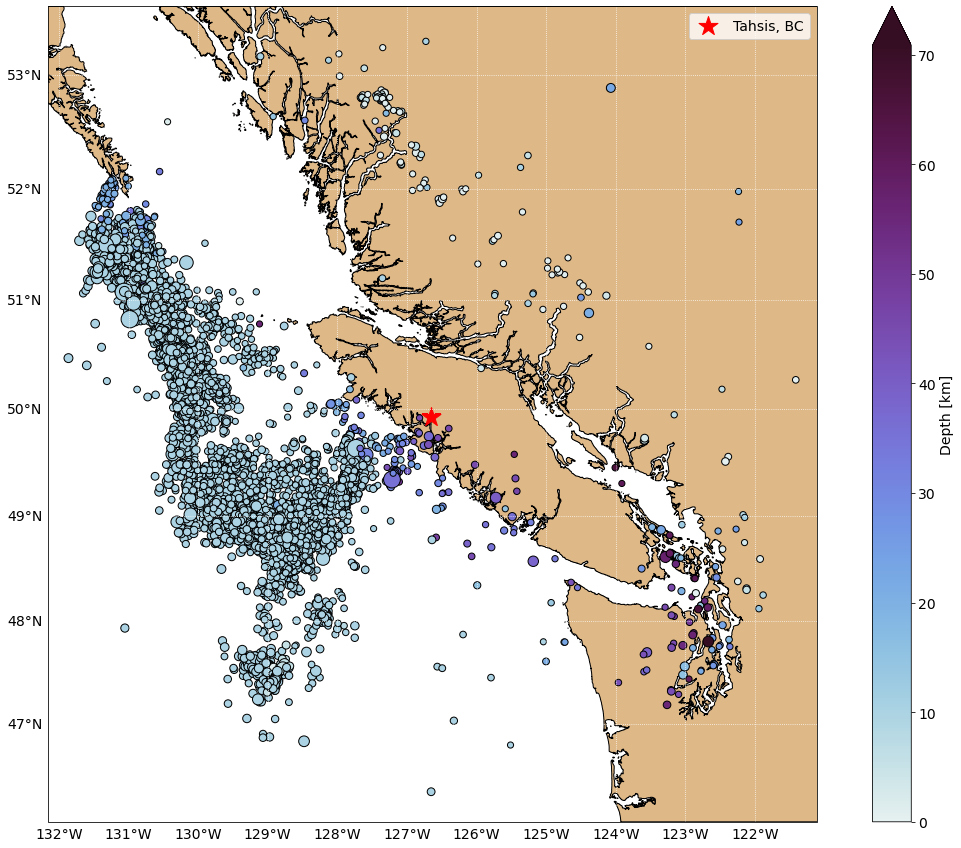

In [33]:
# Increase font size
plt.rcParams['font.size'] = 14

# Make plot area
xlim, ylim = [min(data['Longitude'])-0.3, max(data['Longitude'])+0.3], [min(data['Latitude'])-0.3, max(data['Latitude'])+0.3]
fig, ax = plt.subplots(figsize=(20, 15), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor='burlywood'),zorder=0)

xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='w', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.xlabels_top, gl.ylabels_right = False, False


scatter = ax.scatter(data['Longitude'], data['Latitude'], marker='o', c=data['Depth/km'], cmap =cm.cm.dense ,s=1.7**data['Magnitude']*10,edgecolor='k',transform=crs.PlateCarree(), zorder=1)
ax.scatter(-126.6565, 49.9279, marker='*',s=400,c='r',transform=crs.PlateCarree(),label="Tahsis, BC")
ax.legend()
fig.colorbar(scatter,ax=ax, extend='max',label="Depth [km]")

## Question 2

In [51]:
year = [int(data.Time[i][:4]) for i in range(len(data))]

Text(0.27, 0.31, 'Nootka Fracture Zone')

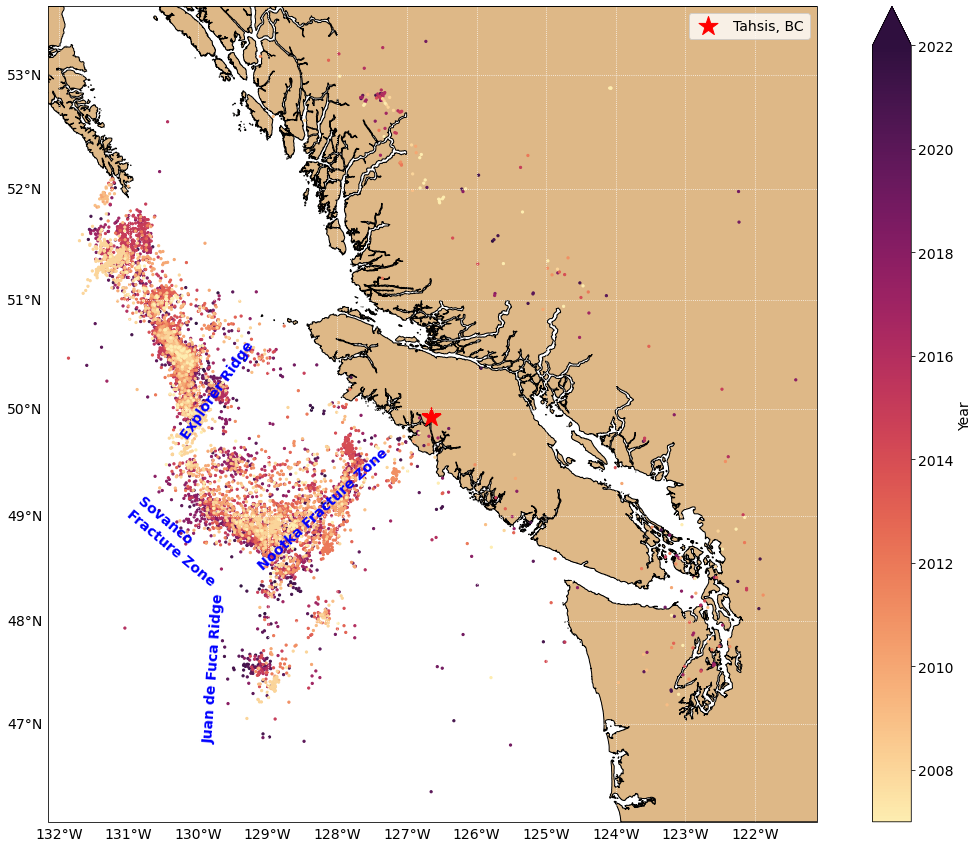

In [94]:
# Increase font size
plt.rcParams['font.size'] = 14

# Make plot area
xlim, ylim = [min(data['Longitude'])-0.3, max(data['Longitude'])+0.3], [min(data['Latitude'])-0.3, max(data['Latitude'])+0.3]
fig, ax = plt.subplots(figsize=(20, 15), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor='burlywood'),zorder=0)

xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='w', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.xlabels_top, gl.ylabels_right = False, False

scatter = ax.scatter(data['Longitude'], data['Latitude'], marker='o', c=year,s=5,cmap=cm.cm.matter,transform=crs.PlateCarree(), zorder=1)
ax.scatter(-126.6565, 49.9279, marker='*',s=400,c='r',transform=crs.PlateCarree(),label="Tahsis, BC")
ax.legend()
fig.colorbar(scatter,ax=ax, extend='max',label="Year")

ax.text(0.17, 0.47, 'Explorer Ridge', weight= "bold",c='b', transform=ax.transAxes, rotation=55)
ax.text(0.1, 0.29, 'Sovanco\nFracture Zone', weight= "bold",c='b', transform=ax.transAxes, rotation=-40)
ax.text(0.2, 0.1, 'Juan de Fuca Ridge', weight= "bold",c='b', transform=ax.transAxes, rotation=86)
ax.text(0.27, 0.31, 'Nootka Fracture Zone', weight= "bold",c='b', transform=ax.transAxes, rotation=43)

## Question 3

In [95]:
# part a - from google earth
srl = 150 #km

In [98]:
# part b
a = 5.16
b = 1.12
M = a+b*math.log10(srl)
print("M= "+str(M))

M= 7.597222210142363


In [99]:
# part c
srl = 75 #km

M = a+b*math.log10(srl)
print("M= "+str(M))

M= 7.260068614998705


## Question 4

In [101]:
# part a - from google earth
Dclose = 73 #km
Dfar = 215 #km

In [104]:
# PGA - strike slip fracture type
e2 = -0.50350
Fm = e2*1

c1 = -0.66050
c2 = 0.11970
c3 = -0.01151
h = 1.35
Mref = 4.5
Rref = 5

Rjb = 73 #km

R = math.sqrt(Rjb**2 + h**2)
Fd = (c1 +c2*(M-Mref))*np.log(R/Rref)+c3*(R-Rref)

Fs = 0

Y = np.exp(Fm + Fd)
print("mean Peak Ground Acceleration = "+str(round(Y,4))+" g")

mean Peak Ground Acceleration = 0.1155 g


In [106]:
# Period=0.3 - strike slip fracture type
M = 7.3

e2 = 0.44516
e7 = 0.10601
Mh = 6.75
Fm = e2*1 + e7*(M-Mh)

c1 = -0.55430
c2 = 0.01955
c3 = -0.00750
h = 2.14
Mref = 4.5
Rref = 1

Rjb = 73 #km

R = math.sqrt(Rjb**2 + h**2)
Fd = (c1 +c2*(M-Mref))*np.log(R/Rref)+c3*(R-Rref)

Fs = 0

Y = np.exp(Fm + Fd)
print("Spectral Acceleration at 0.3 seconds  = "+str(round(Y,4))+" g")

Spectral Acceleration at 0.3 seconds  = 0.113 g


## Question 5

In [107]:
#part a
d=Dfar
Psp = 6 #km/s
Ssp = 3.5 #km/s

Tp = d/Psp
Ts = d/Ssp

print("time P-wave to Tahsis= "+str(Tp)+" s")
print("time S-wave to Tahsis= "+str(Ts)+" s")

time P-wave to Tahsis= 35.833333333333336 s
time S-wave to Tahsis= 61.42857142857143 s


In [108]:
#part b
d = Dclose
Psp = 6 #km/s
Ssp = 3.5 #km/s

Tp = d/Psp
Ts = d/Ssp

print("time P-wave to Tahsis= "+str(Tp)+" s")
print("time S-wave to Tahsis= "+str(Ts)+" s")

time P-wave to Tahsis= 12.166666666666666 s
time S-wave to Tahsis= 20.857142857142858 s


In [109]:
#part c
d = 10 #km
Psp = 6 #km/s
Ssp = 3.5 #km/s

Tp = d/Psp
Ts = d/Ssp

print("time P-wave to offshore network= "+str(Tp)+" s")
print("time S-wave to offshore network= "+str(Ts)+" s")

time P-wave to offshore network= 1.6666666666666667 s
time S-wave to offshore network= 2.857142857142857 s


In [110]:
#part d
print('warning time with network= '+str(Dfar/Psp-10/Psp)+str(" s"))

warning time with network= 34.16666666666667 s


In [111]:
#part e
d = 73
print('warning time without network= '+str(d/Ssp-d/Psp)+' s')

warning time without network= 8.690476190476192 s


### Part f: Wherever you live, lookup local or regional resources on what to do when you feel earthquake shaking.
from city of Vancouver (https://vancouver.ca/home-property-development/during-and-after.aspx):<br>
* If you are indoors, stay indoors – do not run outside during an earthquake. Get under a table — drop, cover, and hold on. If there is no table or desk near you, do not try to run to another room to get under a table. Instead, stay where you are, cover your face and head with your arms, and crouch in an inside corner of the room. Stay away from glass, windows, outside doors and walls, and anything that could fall such as lighting fixtures or furniture. <br>
* If you are outside during an earthquake, stay outside, and move away from buildings, streetlights, and utility wires.
* If you are in a vehicle during an earthquake, stop and park in a clear location, away from buildings, bridges, and overpasses, and stay there until the shaking stops.